In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import subprocess
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

%matplotlib inline

In [47]:
dataset = pd.read_csv('2020_data.csv')

/Users/sangdonlee/opt/anaconda3/envs/python37-2/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [48]:
pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', 3000)
pd.set_option('display.width', 3000)

In [49]:
dataset

,player_name,date,tournament,statistic,variable,value
0,Luke List,2020-07-19,the Memorial Tournament presented by Nationwide,Fairway Bunker Tendency,RANK THIS WEEK,1
1,Rory McIlroy,2020-07-19,the Memorial Tournament presented by Nationwide,Fairway Bunker Tendency,RANK THIS WEEK,1
2,Xander Schauffele,2020-07-19,the Memorial Tournament presented by Nationwide,Fairway Bunker Tendency,RANK THIS WEEK,1
3,Collin Morikawa,2020-07-19,the Memorial Tournament presented by Nationwide,Fairway Bunker Tendency,RANK THIS WEEK,1
4,Jordan Spieth,2020-07-19,the Memorial Tournament presented by Nationwide,Fairway Bunker Tendency,RANK THIS WEEK,5
...,...,...,...,...,...,...
1197179,Nick Taylor,2019-09-15,A Military Tribute at The Greenbrier,Longest Putts,DISTANCE,"17' 4"""
1197180,Russell Henley,2019-09-15,A Military Tribute at The Greenbrier,Longest Putts,DISTANCE,"17' 3"""
1197181,Brian Harman,2019-09-15,A Military Tribute at The Greenbrier,Longest Putts,DISTANCE,"16' 1"""
1197182,Joel Dahmen,2019-09-15,A Military Tribute at The Greenbrier,Longest Putts,DISTANCE,"14' 0"""


In [50]:
StatVar = dataset['statistic'] + ' - (' + dataset['variable'] + ')'
del dataset['variable']
dataset['variable'] = StatVar

In [51]:
dataset.head(1000)

,player_name,date,tournament,statistic,value,variable
0,Luke List,2020-07-19,the Memorial Tournament presented by Nationwide,Fairway Bunker Tendency,1,Fairway Bunker Tendency - (RANK THIS WEEK)
1,Rory McIlroy,2020-07-19,the Memorial Tournament presented by Nationwide,Fairway Bunker Tendency,1,Fairway Bunker Tendency - (RANK THIS WEEK)
2,Xander Schauffele,2020-07-19,the Memorial Tournament presented by Nationwide,Fairway Bunker Tendency,1,Fairway Bunker Tendency - (RANK THIS WEEK)
3,Collin Morikawa,2020-07-19,the Memorial Tournament presented by Nationwide,Fairway Bunker Tendency,1,Fairway Bunker Tendency - (RANK THIS WEEK)
4,Jordan Spieth,2020-07-19,the Memorial Tournament presented by Nationwide,Fairway Bunker Tendency,5,Fairway Bunker Tendency - (RANK THIS WEEK)
5,Joel Dahmen,2020-07-19,the Memorial Tournament presented by Nationwide,Fairway Bunker Tendency,5,Fairway Bunker Tendency - (RANK THIS WEEK)
6,Scott Piercy,2020-07-19,the Memorial Tournament presented by Nationwide,Fairway Bunker Tendency,5,Fairway Bunker Tendency - (RANK THIS WEEK)
7,Jason Day,2020-07-19,the Memorial Tournament presented by Nationwide,Fairway Bunker Tendency,5,Fairway Bunker Tendency - (RANK THIS WEEK)
8,Dylan Frittelli,2020-07-19,the Memorial Tournament presented by Nationwide,Fairway Bunker Tendency,5,Fairway Bunker Tendency - (RANK THIS WEEK)
9,Gary Woodland,2020-07-19,the Memorial Tournament presented by Nationwide,Fairway Bunker Tendency,5,Fairway Bunker Tendency - (RANK THIS WEEK)


In [52]:
wide_df = dataset.set_index(['player_name', 'variable', 'date', 'tournament'])['value'].unstack('variable').reset_index()

In [53]:
wide_df.head()

variable,player_name,date,tournament,% of Potential Pts won - FedExCup Regular Season - (%),% of Potential Pts won - FedExCup Regular Season - (RANK THIS WEEK),1-Putts per Round - (AVG),1-Putts per Round - (RANK THIS WEEK),11-25 Final Round Performance - (% TIMES IMPROVED),11-25 Final Round Performance - (RANK THIS WEEK),2-Putts per Round - (AVG),2-Putts per Round - (RANK THIS WEEK),25+ Final Round Performance - (% TIMES IMPROVED),25+ Final Round Performance - (RANK THIS WEEK),3+ Putts per Round - (AVG),3+ Putts per Round - (RANK THIS WEEK),3-Putt Avoidance - (%),3-Putt Avoidance - (RANK THIS WEEK),3-Putt Avoidance - 10-15' - (%),3-Putt Avoidance - 10-15' - (RANK THIS WEEK),3-Putt Avoidance - 15-20' - (%),3-Putt Avoidance - 15-20' - (RANK THIS WEEK),3-Putt Avoidance - 20-25' - (%),3-Putt Avoidance - 20-25' - (RANK THIS WEEK),3-Putt Avoidance - 5-10' - (%),3-Putt Avoidance - 5-10' - (RANK THIS WEEK),3-Putt Avoidance - Inside 5' - (%),3-Putt Avoidance - Inside 5' - (RANK THIS WEEK),3-Putt Avoidance - Round 1 - (%),3-Putt Avoidance - Round 1 - (RANK THIS WEEK),3-Putt Avoidance - Round 2 - (%),3-Putt Avoidance - Round 2 - (RANK THIS WEEK),3-Putt Avoidance - Round 3 - (%),3-Putt Avoidance - Round 3 - (RANK THIS WEEK),3-Putt Avoidance - Round 4 - (%),3-Putt Avoidance - Round 4 - (RANK THIS WEEK),3-Putt Avoidance > 25' - (%),3-Putt Avoidance > 25' - (RANK THIS WEEK),3-Putts per Round - (AVG),3-Putts per Round - (RANK THIS WEEK),6-10 Final Round Performance - (% TIMES IMPROVED),6-10 Final Round Performance - (RANK THIS WEEK),Accuracy Rating - (RANK THIS WEEK),Accuracy Rating - (RATING),All-Around Ranking - (RANK THIS WEEK),All-Around Ranking - (TOTAL),Approach 100-125 yards (RTP Score) - (AVG RTP),Approach 100-125 yards (RTP Score) - (RANK THIS WEEK),Approach 125-150 yards (RTP Score) - (AVG RTP),Approach 125-150 yards (RTP Score) - (RANK THIS WEEK),Approach 150-175 yards (RTP Score) - (AVG RTP),Approach 150-175 yards (RTP Score) - (RANK THIS WEEK),Approach 175-200 yards (RTP Score) - (AVG RTP),Approach 175-200 yards (RTP Score) - (RANK THIS WEEK),Approach 200-225 yards (RTP) - (AVG RTP),Approach 200-225 yards (RTP) - (RANK THIS WEEK),Approach 225-250 yards (RTP) - (AVG RTP),Approach 225-250 yards (RTP) - (RANK THIS WEEK),Approach 250-275 yards (RTP) - (AVG RTP),Approach 250-275 yards (RTP) - (RANK THIS WEEK),Approach 50-75 yards (RTP Score) - (AVG RTP),Approach 50-75 yards (RTP Score) - (RANK THIS WEEK),Approach 75-100 yards (RTP Score) - (AVG RTP),Approach 75-100 yards (RTP Score) - (RANK THIS WEEK),Approach < 125 yards (RTP Score) - (AVG RTP),Approach < 125 yards (RTP Score) - (RANK THIS WEEK),Approach > 200 yards (RTP Score) - (AVG RTP),Approach > 200 yards (RTP Score) - (RANK THIS WEEK),Approach > 275 yards (RTP) - (AVG RTP),Approach > 275 yards (RTP) - (RANK THIS WEEK),Approach Putt Performance - (RANK THIS WEEK),Approach Putt Performance - (VALUE),Approaches 100-125 yards-Rgh (RTP) - (AVG RTP),Approaches 100-125 yards-Rgh (RTP) - (RANK THIS WEEK),Approaches 125-150 yards-Rgh (RTP) - (AVG RTP),Approaches 125-150 yards-Rgh (RTP) - (RANK THIS WEEK),Approaches 150-175 yards-Rgh (RTP) - (AVG RTP),Approaches 150-175 yards-Rgh (RTP) - (RANK THIS WEEK),Approaches 175-200 yards-Rgh (RTP) - (AVG RTP),Approaches 175-200 yards-Rgh (RTP) - (RANK THIS WEEK),Approaches 200-225 yards-Rgh (RTP) - (AVG RTP),Approaches 200-225 yards-Rgh (RTP) - (RANK THIS WEEK),Approaches 225-250 yards-Rgh (RTP) - (AVG RTP),Approaches 225-250 yards-Rgh (RTP) - (RANK THIS WEEK),Approaches 250-275 yards-Rgh (RTP) - (AVG RTP),Approaches 250-275 yards-Rgh (RTP) - (RANK THIS WEEK),Approaches 50-125 yards-Rgh (RTP) - (AVG RTP),Approaches 50-125 yards-Rgh (RTP) - (RANK THIS WEEK),Approaches 50-75 yards-Rgh (RTP) - (AVG RTP),Approaches 50-75 yards-Rgh (RTP) - (RANK THIS WEEK),Approaches 75-100 yards-Rgh (RTP) - (AVG RTP),Approaches 75-100 yards-Rgh (RTP) - (RANK THIS WEEK),Approaches < 100 yards-Rgh (RTP) - (AVG RTP),Approaches < 100 yards-Rgh (RTP) - (RANK THIS WEEK),Ap

In [54]:
#Narrow down to the more interesting X columns. You could add others.
Keep_Columns = ['player_name',
                'tournament',
                'Total Money (Official and Unofficial) - (MONEY)',
                'Driving Distance - (AVG.)',
                'Driving Accuracy Percentage - (%)',
                'Greens in Regulation Percentage - (%)',
                'Hit Fairway Percentage - (%)',
                'Birdie or Better Percentage - (%)'
               ]

In [55]:
df_selected=wide_df[Keep_Columns]

In [56]:
df_selected.isnull().sum()

variable
player_name                                          0
tournament                                           0
Total Money (Official and Unofficial) - (MONEY)      3
Driving Distance - (AVG.)                          305
Driving Accuracy Percentage - (%)                    1
Greens in Regulation Percentage - (%)                1
Hit Fairway Percentage - (%)                       387
Birdie or Better Percentage - (%)                    1
dtype: int64

In [57]:
df_selected.rename(columns={'Total Money (Official and Unofficial) - (MONEY)' : 'Total_Money'}, inplace=True)
df_selected.rename(columns={'Driving Distance - (AVG.)' :'Driving_Avg'}, inplace=True)
df_selected.rename(columns={'Driving Accuracy Percentage - (%)' :'Driving_Accuracy%'}, inplace=True)
df_selected.rename(columns={'Greens in Regulation Percentage - (%)' :'Geens_in_Regulation%'}, inplace=True)
df_selected.rename(columns={'Hit Fairway Percentage - (%)' :'Hit_Fairway%'}, inplace=True)
df_selected.rename(columns={'Birdie or Better Percentage - (%)' :'Birdie_or_Better%'}, inplace=True)

/Users/sangdonlee/opt/anaconda3/envs/python37-2/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [58]:
df_selected.columns[2:]

Index(['Total_Money', 'Driving_Avg', 'Driving_Accuracy%', 'Geens_in_Regulation%', 'Hit_Fairway%', 'Birdie_or_Better%'], dtype='object', name='variable')

In [59]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1973 entries, 0 to 1972
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   player_name           1973 non-null   object
 1   tournament            1973 non-null   object
 2   Total_Money           1970 non-null   object
 3   Driving_Avg           1668 non-null   object
 4   Driving_Accuracy%     1972 non-null   object
 5   Geens_in_Regulation%  1972 non-null   object
 6   Hit_Fairway%          1586 non-null   object
 7   Birdie_or_Better%     1972 non-null   object
dtypes: object(8)
memory usage: 123.4+ KB


In [60]:
df_selected.head()

variable,player_name,tournament,Total_Money,Driving_Avg,Driving_Accuracy%,Geens_in_Regulation%,Hit_Fairway%,Birdie_or_Better%
0,Aaron Baddeley,Safeway Open,"$34,461",285.1,51.79,61.11,52.73,20.83
1,Aaron Baddeley,Shriners Hospitals for Children Open,"$33,320",307.9,67.86,75.00,67.86,30.56
2,Aaron Baddeley,Mayakoba Golf Classic,"$51,480",274.5,62.50,62.50,NaN,29.17
3,Aaron Baddeley,Farmers Insurance Open,"$16,050",281.6,60.71,62.50,59.52,19.44
4,Aaron Baddeley,Waste Management Phoenix Open,"$28,835",294.9,57.14,70.83,57.14,22.22


In [20]:
df_selected['Driving_Avg'] = df_selected['Driving_Avg'].astype(float)

/Users/sangdonlee/opt/anaconda3/envs/python37-2/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1973 entries, 0 to 1972
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   player_name           1973 non-null   object 
 1   tournament            1973 non-null   object 
 2   Total_Money           1970 non-null   object 
 3   Driving_Avg           1668 non-null   float64
 4   Driving_Accuracy%     1972 non-null   object 
 5   Geens_in_Regulation%  1972 non-null   object 
 6   Hit_Fairway%          1586 non-null   object 
 7   Birdie_or_Better%     1972 non-null   object 
dtypes: float64(1), object(7)
memory usage: 123.4+ KB


In [61]:
df_selected['Total_Money'] = df_selected['Total_Money'].fillna(0)
df_selected['Total_Money'] = df_selected['Total_Money'].replace(',', '', regex=True)
df_selected['Total_Money'] = df_selected['Total_Money'].str.replace('$', '')
df_selected['Total_Money'] = df_selected['Total_Money'].replace('', 0, regex=True)

/Users/sangdonlee/opt/anaconda3/envs/python37-2/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/sangdonlee/opt/anaconda3/envs/python37-2/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/sangdonlee/opt/anaconda3/envs/python37-2/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

In [63]:
df_selected.head()

variable,player_name,tournament,Total_Money,Driving_Avg,Driving_Accuracy%,Geens_in_Regulation%,Hit_Fairway%,Birdie_or_Better%
0,Aaron Baddeley,Safeway Open,34461,285.1,51.79,61.11,52.73,20.83
1,Aaron Baddeley,Shriners Hospitals for Children Open,33320,307.9,67.86,75.00,67.86,30.56
2,Aaron Baddeley,Mayakoba Golf Classic,51480,274.5,62.50,62.50,NaN,29.17
3,Aaron Baddeley,Farmers Insurance Open,16050,281.6,60.71,62.50,59.52,19.44
4,Aaron Baddeley,Waste Management Phoenix Open,28835,294.9,57.14,70.83,57.14,22.22


In [64]:
df_selected.isna().sum()

variable
player_name               0
tournament                0
Total_Money               3
Driving_Avg             305
Driving_Accuracy%         1
Geens_in_Regulation%      1
Hit_Fairway%            387
Birdie_or_Better%         1
dtype: int64

In [65]:
np.where(df_selected.applymap(lambda x: x == ''))

(array([], dtype=int64), array([], dtype=int64))

In [66]:
df_selected.head()

variable,player_name,tournament,Total_Money,Driving_Avg,Driving_Accuracy%,Geens_in_Regulation%,Hit_Fairway%,Birdie_or_Better%
0,Aaron Baddeley,Safeway Open,34461,285.1,51.79,61.11,52.73,20.83
1,Aaron Baddeley,Shriners Hospitals for Children Open,33320,307.9,67.86,75.00,67.86,30.56
2,Aaron Baddeley,Mayakoba Golf Classic,51480,274.5,62.50,62.50,NaN,29.17
3,Aaron Baddeley,Farmers Insurance Open,16050,281.6,60.71,62.50,59.52,19.44
4,Aaron Baddeley,Waste Management Phoenix Open,28835,294.9,57.14,70.83,57.14,22.22


In [67]:
### change the types from objects to float64

for col in  df_selected.columns[2:]:
   df_selected[col] = df_selected[col].astype(float)
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1973 entries, 0 to 1972
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   player_name           1973 non-null   object 
 1   tournament            1973 non-null   object 
 2   Total_Money           1970 non-null   float64
 3   Driving_Avg           1668 non-null   float64
 4   Driving_Accuracy%     1972 non-null   float64
 5   Geens_in_Regulation%  1972 non-null   float64
 6   Hit_Fairway%          1586 non-null   float64
 7   Birdie_or_Better%     1972 non-null   float64
dtypes: float64(6), object(2)
memory usage: 123.4+ KB


/Users/sangdonlee/opt/anaconda3/envs/python37-2/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [68]:
df_selected.isna().sum()

variable
player_name               0
tournament                0
Total_Money               3
Driving_Avg             305
Driving_Accuracy%         1
Geens_in_Regulation%      1
Hit_Fairway%            387
Birdie_or_Better%         1
dtype: int64

In [70]:
## groupby and aggregate with mean sum for the numeric featrues 
df_mean_sum = df_selected.groupby(['player_name'])['Total_Money', 'Driving_Avg', 'Driving_Accuracy%', 'Geens_in_Regulation%', 'Hit_Fairway%', 'Birdie_or_Better%' ].agg(['mean','sum']).reset_index()


/Users/sangdonlee/opt/anaconda3/envs/python37-2/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [71]:
## Check columns
df_mean_sum.columns

MultiIndex([(         'player_name',     ''),
            (         'Total_Money', 'mean'),
            (         'Total_Money',  'sum'),
            (         'Driving_Avg', 'mean'),
            (         'Driving_Avg',  'sum'),
            (   'Driving_Accuracy%', 'mean'),
            (   'Driving_Accuracy%',  'sum'),
            ('Geens_in_Regulation%', 'mean'),
            ('Geens_in_Regulation%',  'sum'),
            (        'Hit_Fairway%', 'mean'),
            (        'Hit_Fairway%',  'sum'),
            (   'Birdie_or_Better%', 'mean'),
            (   'Birdie_or_Better%',  'sum')],
           )

In [72]:
## As multi indexed columns concat the indexes to make single index
df_mean_sum.columns = df_mean_sum.columns.map('_'.join)

In [73]:
df_mean_sum.columns

Index(['player_name_', 'Total_Money_mean', 'Total_Money_sum', 'Driving_Avg_mean', 'Driving_Avg_sum', 'Driving_Accuracy%_mean', 'Driving_Accuracy%_sum', 'Geens_in_Regulation%_mean', 'Geens_in_Regulation%_sum', 'Hit_Fairway%_mean', 'Hit_Fairway%_sum', 'Birdie_or_Better%_mean', 'Birdie_or_Better%_sum'], dtype='object')

In [74]:
## drop unneccsary the columns
df_final = df_mean_sum.drop(columns = ['Total_Money_mean', 
                                       'Driving_Avg_sum', 
                                       'Driving_Accuracy%_sum', 
                                       'Geens_in_Regulation%_sum',
                                       'Hit_Fairway%_sum',
                                       'Birdie_or_Better%_sum'
                                      ])

In [75]:
df_final.sort_values('Driving_Avg_mean', ascending=False).head()

,player_name_,Total_Money_sum,Driving_Avg_mean,Driving_Accuracy%_mean,Geens_in_Regulation%_mean,Hit_Fairway%_mean,Birdie_or_Better%_mean
248,Ryan Fox,73500.0,345.6,55.360,62.500,56.36,27.780
178,Lucas Herbert,36500.0,339.1,50.000,65.280,50.00,15.280
299,Victor Perez,409100.0,339.1,53.570,66.670,43.64,25.695
322,Zander Lombard,136500.0,336.0,58.035,63.890,61.11,25.000
198,Matthias Schwab,419500.0,334.4,50.890,69.445,50.00,22.915


In [76]:
df_final_corr = df_final.corr()

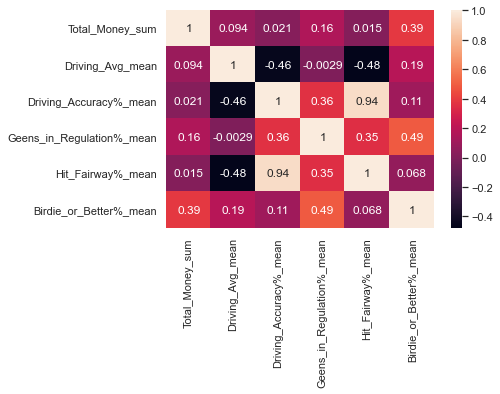

In [77]:
sns.set(style = 'white')
sns.heatmap(df_final_corr, vmax=1, annot=True)

In [78]:
df_final.fillna(df_final.mean(), inplace = True)

In [79]:
df_final.isnull().sum()

player_name_                 0
Total_Money_sum              0
Driving_Avg_mean             0
Driving_Accuracy%_mean       0
Geens_in_Regulation%_mean    0
Hit_Fairway%_mean            0
Birdie_or_Better%_mean       0
dtype: int64

In [80]:
df_final.corr()

,Total_Money_sum,Driving_Avg_mean,Driving_Accuracy%_mean,Geens_in_Regulation%_mean,Hit_Fairway%_mean,Birdie_or_Better%_mean
Total_Money_sum,1.000000,0.091936,0.020546,0.158349,0.014668,0.385180
Driving_Avg_mean,0.091936,1.000000,-0.414251,-0.002578,-0.475595,0.159006
Driving_Accuracy%_mean,0.020546,-0.414251,1.000000,0.364561,0.850716,0.108681
Geens_in_Regulation%_mean,0.158349,-0.002578,0.364561,1.000000,0.312548,0.490223
Hit_Fairway%_mean,0.014668,-0.475595,0.850716,0.312548,1.000000,0.056432
Birdie_or_Better%_mean,0.385180,0.159006,0.108681,0.490223,0.056432,1.000000


In [81]:
df_final.describe()

,Total_Money_sum,Driving_Avg_mean,Driving_Accuracy%_mean,Geens_in_Regulation%_mean,Hit_Fairway%_mean,Birdie_or_Better%_mean
count,3.240000e+02,324.000000,324.000000,324.000000,324.000000,324.000000
mean,6.888513e+05,298.075247,60.863674,66.832833,61.162620,21.731794
std,9.723887e+05,12.435757,7.785401,5.746601,7.171419,3.400910
min,0.000000e+00,250.900000,33.930000,41.670000,39.020000,9.720000
25%,7.115625e+04,291.203125,55.698333,64.624519,57.131429,20.294018
50%,2.486045e+05,298.075247,60.690625,67.528029,61.162620,22.220000
75%,8.955630e+05,303.853125,65.146696,70.381750,64.634833,23.611488
max,5.520562e+06,345.600000,85.715000,81.940000,88.100000,31.940000


In [93]:
df_final['Total_Money_sum']

0       222813.0
1       100159.0
2      2757003.0
3      1728311.0
4      1382041.0
5       596555.0
6      3812358.0
7        90328.0
8       490264.0
9        18257.0
10       56500.0
11     1419819.0
12       31159.0
13      478653.0
14       67125.0
15       49168.0
16       21019.0
17       46000.0
18      341063.0
19      557344.0
20       33481.0
21      206485.0
22       78325.0
23      173625.0
24      112700.0
25       16117.0
26       95193.0
27     1857200.0
28      369628.0
29       29988.0
30       46875.0
31       88125.0
32       18263.0
33      354444.0
34      247417.0
35      172987.0
36      819709.0
37     1557152.0
38     2278226.0
39      543784.0
40      992508.0
41     1069185.0
42      546392.0
43      564789.0
44      390812.0
46     4817195.0
47     1214939.0
48      906907.0
49     2122839.0
50      304515.0
51       18257.0
52     1931756.0
53      529313.0
54      425362.0
55     2081673.0
56      660247.0
57       43245.0
58      111000.0
59     1632686

In [91]:
df_final.drop(df_final[df_final.Total_Money_sum == 0].index, inplace=True)

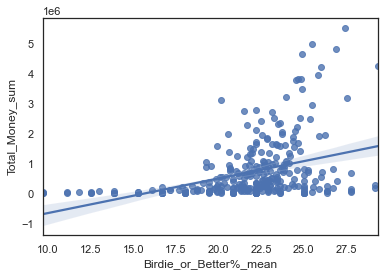

In [92]:
sns.regplot(x="Birdie_or_Better%_mean", y="Total_Money_sum", data=df_final);

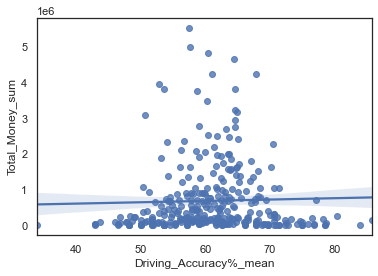

In [94]:
sns.regplot(x="Driving_Accuracy%_mean", y="Total_Money_sum", data=df_final);

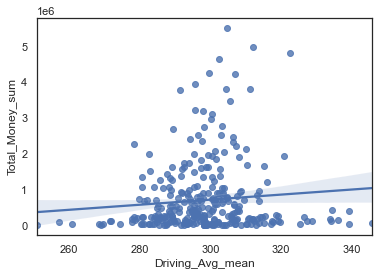

In [95]:
sns.regplot(x="Driving_Avg_mean", y="Total_Money_sum", data=df_final);

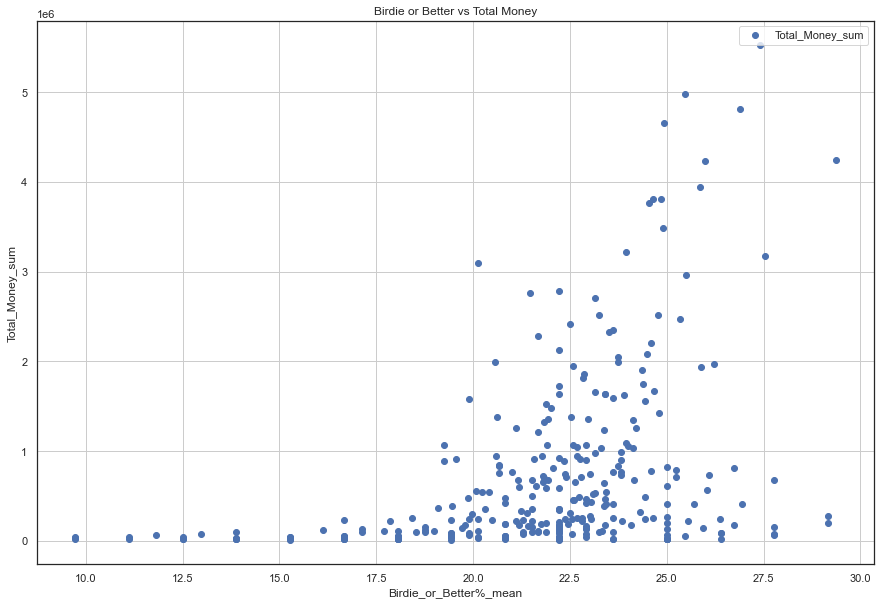

In [96]:
df_final.plot(x='Birdie_or_Better%_mean', y='Total_Money_sum', style = 'o', figsize=(15,10))
plt.grid()
plt.title('Birdie or Better vs Total Money')
plt.xlabel('Birdie_or_Better%_mean')
plt.ylabel('Total_Money_sum')
plt.show()

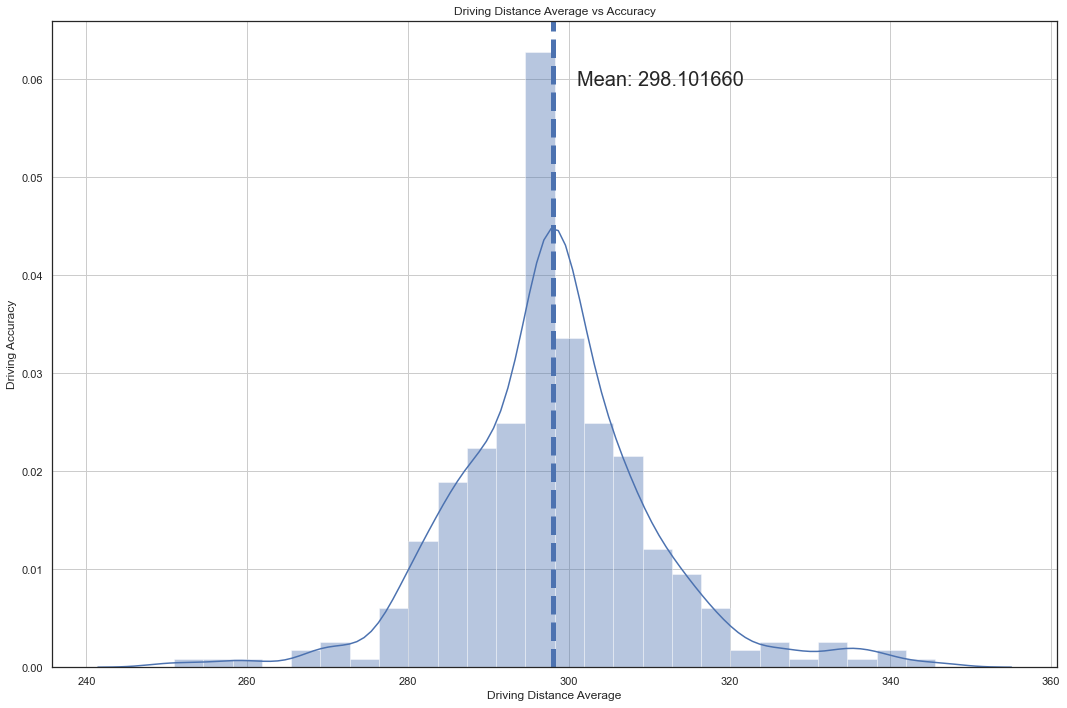

In [99]:
plt.figure(figsize=(15,10))
sns.distplot(df_final['Driving_Avg_mean'])
plt.axvline(df_final['Driving_Avg_mean'].mean(), color = 'b', linestyle='--', linewidth=5)
min_, max_ = plt.ylim()
plt.text(
            df_final['Driving_Avg_mean'].mean() + df_final['Driving_Avg_mean'].mean()/100,
            max_ - max_/10,
            "Mean: {:2f}".format(df_final['Driving_Avg_mean'].mean()),
            fontsize=20
        )
plt.grid()
plt.title('Driving Distance Average vs Accuracy')
plt.xlabel('Driving Distance Average')
plt.ylabel('Driving Accuracy')
plt.tight_layout()

In [100]:
X = df_final['Driving_Avg_mean'].values.reshape(-1, 1)
y = df_final['Total_Money_sum'].values.reshape(-1, 1)

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40)

In [102]:
regressor = LinearRegression()

In [103]:
regressor.fit(X_train, y_train)

LinearRegression()

In [104]:
print(regressor.intercept_)

[-2027081.85876866]


In [105]:
print(regressor.coef_)

[[9115.72349425]]


In [106]:
y_pred = regressor.predict(X_test)

In [107]:
df_new = pd.DataFrame({'Actual' : y_test.flatten(), 'Predicted': y_pred.flatten()})

In [108]:
df_new.head(25)

,Actual,Predicted
0,683070.0,833523.330963
1,171699.0,571810.909443
2,13794.0,632886.256855
3,18257.0,737717.077038
4,19204.0,692138.459567
5,4657731.0,728731.578166
6,59830.0,833432.173728
7,45500.0,707635.189507
8,1994186.0,548110.028358
9,176506.0,717271.811487


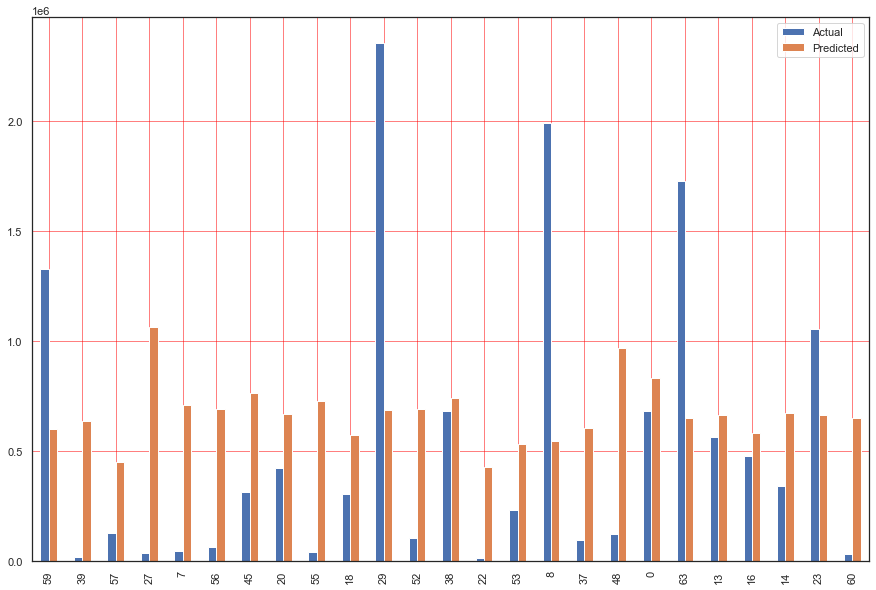

In [109]:
df1 = df_new.sample(25)
df1.plot(kind = 'bar', figsize=(15,10))
plt.grid(which = 'major', linestyle = '-', linewidth = '0.5', color = 'red')
plt.grid(which = 'minor', linestyle = ':', linewidth = '0.5', color = 'yellow')
plt.show()


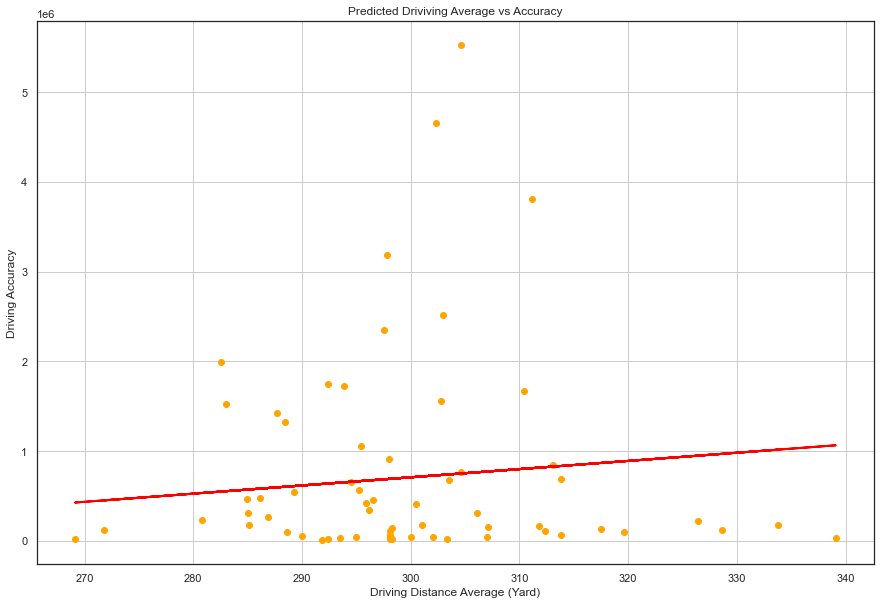

In [110]:
plt.figure(figsize=(15,10))
plt.grid()
plt.scatter(X_test, y_test, color = 'orange')
plt.plot(X_test, y_pred, color = 'red', linewidth = 2)
plt.title('Predicted Driviving Average vs Accuracy')
plt.xlabel('Driving Distance Average (Yard)')
plt.ylabel('Driving Accuracy')
plt.show()

In [111]:
## Errors
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = metrics.r2_score(y_test, y_pred)
print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R2 score: {r2:.2f}')

MAE: 770849.72
MSE: 1284317830075.64
RMSE: 1133277.47
R2 score: -0.01


root mean squared error is 6.08, which shows that the model of linear regression does not predict really well 

In [123]:
X = pd.DataFrame(df_final, columns = df_final.columns)

In [125]:
X.drop(columns = ['player_name_'], inplace=True)

In [128]:
X.columns

Index(['Total_Money_sum', 'Driving_Avg_mean', 'Driving_Accuracy%_mean', 'Geens_in_Regulation%_mean', 'Hit_Fairway%_mean', 'Birdie_or_Better%_mean'], dtype='object')

In [126]:
y = df_final.Total_Money_sum

In [127]:
show_steps = True
included = []
# keep track of model and parameters
best = {'feature': '', 'r2': 0, 'a_r2': 0}
# create a model object to hold the modelling parameters
model = LinearRegression()
# get the number of cases in the test data
n = X_test.shape[0]

r2_list = []
adjusted_r2_list = []

while True:
    changed = False
    
    if show_steps:
        print('') 

    # list the features to be evaluated
    excluded = list(set(X.columns) - set(included))
    
    if show_steps:
        print('(Step) Excluded = %s' % ', '.join(excluded))  

    # for each remaining feature to be evaluated
    for new_column in excluded:
        
        if show_steps:
            print('(Step) Trying %s...' % new_column)
            print('(Step) - Features = %s' % ', '.join(included + [new_column]))

        # fit the model with the Training data
        fit = model.fit(X_train[included + [new_column]], y_train)
        # calculate the score (R^2 for Regression)
        r2 = fit.score(X_train[included + [new_column]], y_train)
        
        # number of predictors in this model
        k = len(included) + 1
        # calculate the adjusted R^2
        adjusted_r2 = 1 - ( ( (1 - r2) * (n - 1) ) / (n - k - 1) )
        
        if show_steps:
            print('(Step) - Adjusted R^2: This = %.3f; Best = %.3f' % 
                  (adjusted_r2, best['a_r2']))

        # if model improves
        if adjusted_r2 > best['a_r2']:
            # record new parameters
            best = {'feature': new_column, 'r2': r2, 'a_r2': adjusted_r2}
            # flag that found a better model
            changed = True
            if show_steps:
                print('(Step) - New Best!   : Feature = %s; R^2 = %.3f; Adjusted R^2 = %.3f' % 
                      (best['feature'], best['r2'], best['a_r2']))
    # END for
    
    r2_list.append(best['r2'])
    adjusted_r2_list.append(best['a_r2'])

    # if found a better model after testing all remaining features
    if changed:
        # update control details
        included.append(best['feature'])
        excluded = list(set(excluded) - set(best['feature']))
        print('Added feature %-4s with R^2 = %.3f and adjusted R^2 = %.3f' % 
              (best['feature'], best['r2'], best['a_r2']))
    else:
        # terminate if no better model
        print('*'*50)
        break

print('')
print('Resulting features:')
print(', '.join(included))


(Step) Excluded = Geens_in_Regulation%_mean, Birdie_or_Better%_mean, Hit_Fairway%_mean, Total_Money_sum, Driving_Accuracy%_mean, Driving_Avg_mean
(Step) Trying Geens_in_Regulation%_mean...
(Step) - Features = Geens_in_Regulation%_mean


/Users/sangdonlee/opt/anaconda3/envs/python37-2/lib/python3.7/site-packages/ipykernel_launcher.py:33: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [64]:
from scipy import stats
from statsmodels.stats import weightstats as stests
ztest ,pval = stests.ztest(df_final['Driving_Avg_mean'], value=298)
print(float(pval))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

0.913269593400812
accept null hypothesis
